In [720]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
# image segmentation
import numpy as np
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from photutils.segmentation import deblend_sources
##########################################
from photutils.background import Background2D, MedianBackground, SExtractorBackground
from photutils.segmentation import make_2dgaussian_kernel, detect_sources
from astropy.convolution import convolve
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [273]:
data_path = '../data/'
fitsfile = data_path + 'hlsp_fresco_hst_acs-wfc_goods-s_f814w_v1.0_sci.fits'

In [274]:
#getting redhshift samples

In [140]:
catalog = '../data/sample_details/'
eelgs = catalog + 'eelgs_28aug2024.dat'
control = catalog + 'control_28aug2024.dat'

In [611]:
use_control = False
if use_control == True:
    data_columns = np.loadtxt(control, dtype='str', delimiter=',')[0]
    data = np.loadtxt(control, delimiter=',', skiprows=1)
else:
    
    data_columns = np.loadtxt(eelgs, dtype='str', delimiter=',')[0]
    data = np.loadtxt(eelgs, delimiter=',', skiprows=1)

In [612]:
new_dtype = [(name, float) for name in data_columns]
data = np.array([tuple(row) for row in data], dtype=new_dtype)

In [613]:
data

array([(20366., 3.531, 53.0987511, -27.7647896, 3.4732    ),
       (11462., 3.81 , 53.1388474, -27.8353653, 3.7941    ),
       (12533., 3.545, 53.1426048, -27.82654  , 3.568     ),
       (17189., 3.54 , 53.198288 , -27.7891598, 3.549808  ),
       (17342., 3.501, 53.1433754, -27.7879868, 3.432626  ),
       (18561., 3.512, 53.055069 , -27.7784939, 3.5151    ),
       (18742., 3.464, 53.159565 , -27.7767086, 3.436     ),
       (11398., 3.545, 53.1532478, -27.8358936, 3.4815    ),
       (15097., 3.29 , 53.0877037, -27.8056965, 3.3908    ),
       (15357., 2.612, 53.1407394, -27.8039989, 2.61559148),
       (15992., 3.626, 53.0717278, -27.7983799, 3.653     ),
       (17583., 2.736, 53.1807785, -27.7862606, 2.69004245),
       (18053., 3.306, 53.1957283, -27.7827244, 3.3221321 ),
       (19088., 2.654, 53.1037254, -27.7742615, 2.584     ),
       (19437., 3.51 , 53.1151047, -27.7718334, 3.57424   ),
       (19843., 3.49 , 53.0758705, -27.7686558, 3.431     ),
       (19863., 3.077, 5

In [614]:
data.size

33

In [615]:
ind = np.where(data['zspec'] > 3.08)
if use_control == True:
    ra, dec, zspec = data['RA'][ind], data['dec'][ind], data['zspec'][ind]
else:
    ra, dec, zspec = data['RA'.lower()][ind], data['dec'][ind], data['zspec'][ind]

In [616]:
ra, dec, zspec

(array([53.0987511, 53.1388474, 53.1426048, 53.198288 , 53.1433754,
        53.055069 , 53.159565 , 53.1532478, 53.0877037, 53.0717278,
        53.1957283, 53.1151047, 53.0758705, 53.1699257, 53.0714569,
        53.1649323, 53.1175003, 53.1298828, 53.1528931, 53.124752 ,
        53.0872498, 53.1044121, 53.1534767, 53.1294899, 53.1330681,
        53.1312981, 53.1094475]),
 array([-27.7647896, -27.8353653, -27.82654  , -27.7891598, -27.7879868,
        -27.7784939, -27.7767086, -27.8358936, -27.8056965, -27.7983799,
        -27.7827244, -27.7718334, -27.7686558, -27.7683067, -27.7672634,
        -27.7651215, -27.7578754, -27.7519283, -27.7492619, -27.744976 ,
        -27.7295341, -27.8391361, -27.8213882, -27.8308983, -27.8301773,
        -27.7930317, -27.7440567]),
 array([3.4732   , 3.7941   , 3.568    , 3.549808 , 3.432626 , 3.5151   ,
        3.436    , 3.4815   , 3.3908   , 3.653    , 3.3221321, 3.57424  ,
        3.431    , 3.089686 , 3.4096   , 3.1877   , 3.5093   , 3.438    ,
   

In [617]:
len(ra)

27

In [618]:
ls '../data/'

hlsp_fresco_hst_acs-wfc_goods-s_f435w_v1.0_sci.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f435w_v1.0_wht.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f475w_v1.0_sci.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f475w_v1.0_wht.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f606w_v1.0_sci.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f606w_v1.0_wht.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f775w_v1.0_sci.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f775w_v1.0_wht.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f814w_v1.0_sci.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f814w_v1.0_wht.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f850lp_v1.0_sci.fits*
hlsp_fresco_hst_acs-wfc_goods-s_f850lp_v1.0_wht.fits*
hlsp_fresco_hst_wfc3-ir_goods-s_f105w_v1.0_sci.fits*
hlsp_fresco_hst_wfc3-ir_goods-s_f105w_v1.0_wht.fits*
hlsp_fresco_hst_wfc3-ir_goods-s_f110w_v1.0_sci.fits*
hlsp_fresco_hst_wfc3-ir_goods-s_f110w_v1.0_wht.fits*
hlsp_fresco_hst_wfc3-ir_goods-s_f125w_v1.0_sci.fits*
hlsp_fresco_hst_wfc3-ir_goods-s_f125w_v1.0_wht.fits*
hlsp_fresco_hst_wfc3-ir_goods-s_f140w_v1.0_s

In [658]:
fitsfile = data_path + 'hlsp_fresco_hst_acs-wfc_goods-s_f814w_v1.0_sci.fits'
#if 
#fitsfile = data_path + 'hlsp_fresco_hst_wfc3-uvis_goods-s_f336w_v1.0_sci.fits' #


In [659]:
f = fits.open(fitsfile)

In [660]:
f[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                12288                                                  
NAXIS2  =                13312                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =               6144.0 / Pixel coordinate of reference point            
CRPIX2  =               6656.0 / Pixel coordinate of reference point            
CD1_1   = -1.1111111111111E-05 / Coordinate transformation matrix element       
CD1_2   =                    0 / Coordinate transformation matrix element       
CD2_1   =                    0 / Coordinate transformation matrix element       
CD2_2   =  1.1111111111111E-05 / Coordinate transformation matrix element       
CDELT1  =                  1

In [661]:
flux_units = f[0].header['bunit']
filt       = f[0].header['FILTER']

In [662]:
f[0].data.shape, flux_units

((13312, 12288), '10*nJy')

In [663]:
f[0].data.max(), f[0].data.min()

(1557.8682, -0.40094608)

In [664]:
wcs = WCS(f[0])

In [665]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 53.128 -27.8034 
CRPIX : 6144.0 6656.0 
CD1_1 CD1_2  : -1.1111111111111e-05 0.0 
CD2_1 CD2_2  : 0.0 1.1111111111111e-05 
NAXIS : 12288  13312

In [666]:
f.info()

Filename: ../data/hlsp_fresco_hst_acs-wfc_goods-s_f814w_v1.0_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     905   (12288, 13312)   float32   


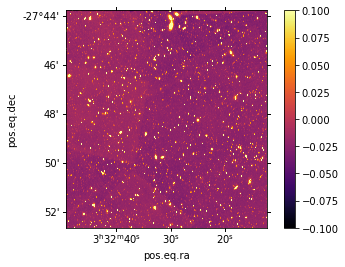

In [667]:
fig = plt.subplot(projection=wcs)
plt.imshow(f[0].data, vmax=0.1, vmin=-0.1, origin='lower', cmap='inferno')
plt.colorbar()
plt.show()

In [668]:
def cutout_centered_on_local_peak_with_background_rms(
    image_data, wcs, position, size, annulus_distance, annulus_width):
    """
    Create a cutout image around a specified RA/Dec, find the peak flux within
    this region, recenter a cutout around the peak, and calculate the RMS noise
    of the background away from the central source.

    Parameters:
    - image_data (2D array): Input image data with flux density values.
    - wcs (WCS): WCS information for the input image.
    - position (tuple): RA and Dec of the center to look around, in degrees.
    - size (int or tuple): Cutout size, in pixels. Should be an integer or (ny, nx).
    - annulus_distance (astropy Quantity): Distance from the peak to the inner edge of the annulus (e.g., 40 * u.arcsec).
    - annulus_width (astropy Quantity): Width of the annulus (e.g., 20 * u.arcsec).

    Returns:
    - peak_cutout_data (2D array): Final cutout image data centered on peak flux.
    - peak_cutout_wcs (WCS): Updated WCS information for the final cutout.
    - background_rms (float): RMS noise level estimated from the background.
    """
    # Convert RA/Dec to pixel coordinates for the initial center
    coord = SkyCoord(ra=position[0]*u.deg, dec=position[1]*u.deg, frame='icrs')
    initial_center_pix = wcs.world_to_pixel(coord)
    
    # Step 1: Create an initial cutout around the specified RA/Dec position
    initial_cutout = Cutout2D(image_data, initial_center_pix, size, wcs=wcs)
    
    # Step 2: Find the local peak within the initial cutout
    peak_position_cutout = np.unravel_index(np.argmax(initial_cutout.data), initial_cutout.data.shape)
    
    # Calculate global pixel coordinates of the peak position
    peak_position_global = (initial_cutout.origin_original[0] + peak_position_cutout[1],
                            initial_cutout.origin_original[1] + peak_position_cutout[0])
    
    # Step 3: Create a new cutout centered on the peak position
    peak_cutout = Cutout2D(image_data, peak_position_global, size, wcs=wcs)
    
    # Step 4: Convert annulus distance and width from angular units to pixels
    annulus_distance_pix = annulus_distance.to(u.deg) / abs(wcs.pixel_scale_matrix[1, 1])  # Convert to pixels
    annulus_width_pix = annulus_width.to(u.deg) / abs(wcs.pixel_scale_matrix[1, 1])       # Convert to pixels
    
    # Calculate the inner and outer radius in pixels
    annulus_inner_radius = annulus_distance_pix.value
    annulus_outer_radius = (annulus_distance_pix + annulus_width_pix).value
    
    # Step 5: Define the background annulus mask within the cutout
    y, x = np.ogrid[:peak_cutout.data.shape[0], :peak_cutout.data.shape[1]]
    distance_from_peak = np.sqrt((x - peak_cutout.data.shape[1] // 2)**2 + (y - peak_cutout.data.shape[0] // 2)**2)
    background_mask = (distance_from_peak >= annulus_inner_radius) & (distance_from_peak <= annulus_outer_radius)
    
    # Calculate the RMS noise in the background annulus, using only pixels within the annulus mask in the cutout
    background_rms = np.std(peak_cutout.data[background_mask])
    
    # Return the data, WCS, and background RMS for the peak-centered cutout
    return peak_cutout.data, peak_cutout.wcs, background_rms, background_mask

def fill_masked_with_noise(image, mask):
    """
    Fills masked regions of an image with noise matching the unmasked regions.

    Parameters:
    - image (numpy.ndarray): The input image.
    - mask (numpy.ndarray): A boolean mask where True indicates masked pixels.

    Returns:
    - numpy.ndarray: The image with masked regions filled with noise.
    """
    if image.shape != mask.shape:
        raise ValueError("Image and mask must have the same shape.")
    
    # Create a masked array
    masked_image = np.ma.masked_array(image, mask=mask)
    
    # Calculate noise level (standard deviation of unmasked pixels)
    noise_level = np.std(masked_image.compressed())
    
    # Generate noise for masked pixels
    random_noise = np.random.normal(loc=0, scale=noise_level, size=image.shape)
    
    # Create a copy of the original image to modify
    noisy_image = image.copy()
    
    # Fill the masked regions with generated noise
    noisy_image[mask] = random_noise[mask]
    
    return noisy_image


In [669]:
peak_cutout_data_arr, peak_cutout_wcs_arr, background_rms_arr, background_mask_arr = [],[],[],[]

for i in range(len(ra)):
    try:
        peak_cutout_data, peak_cutout_wcs, background_rms, background_mask = cutout_centered_on_local_peak_with_background_rms(\
                                                            image_data=f[0].data, wcs=wcs,\
                                                            position=[ra[i], dec[i]], size=3*u.arcsecond, \
                                                            annulus_distance=.5*u.arcsecond, annulus_width=0.2*u.arcsecond)

        peak_cutout_data_arr .append( peak_cutout_data)
        peak_cutout_wcs_arr  .append( peak_cutout_wcs )
        background_rms_arr   .append( background_rms  )
        background_mask_arr  .append( background_mask )
        
    except:
        pass

In [670]:
data['id'][8]

15097.0

In [671]:
primary_hdu = fits.PrimaryHDU(data=peak_cutout_data, header=peak_cutout_wcs.to_header())
primary_hdu.header = f[0].header
# Step 5: Combine HDUs into an HDUList
hdulist = fits.HDUList([primary_hdu])

# Step 6: Write the HDUList to a FITS file
#hdulist.writeto('anshu_gal210w.fits', overwrite=True)

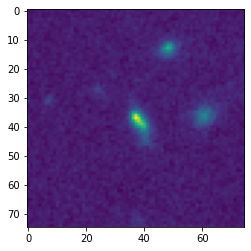

In [672]:
plt.imshow(peak_cutout_data_arr[8])

In [673]:
ra[8]

53.0877037

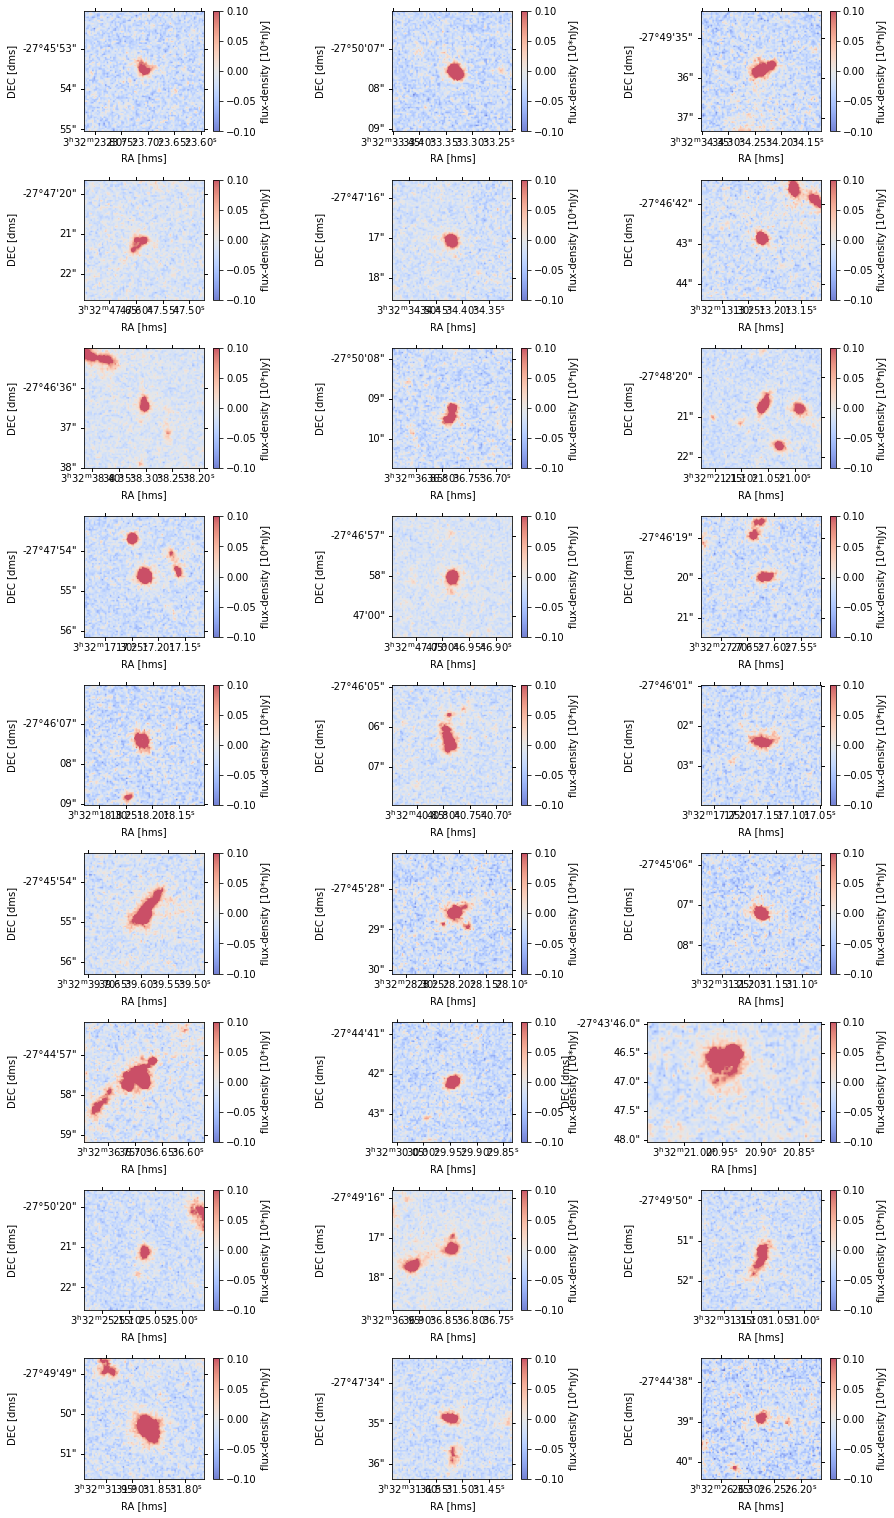

In [674]:
# Set up a figure with a grid of 10 rows and 3 columns
fig, axes = plt.subplots(nrows=len(ra)//3, ncols=3, figsize=(15, len(ra)), subplot_kw={'projection': peak_cutout_wcs_arr[0]})

fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between subplots
# Loop through each subplot and each image
for i, ax in enumerate(axes.flat):
    if i < len(peak_cutout_data_arr):
        # Set the WCS projection for each subplot
        ax = plt.subplot(len(ra)//3, 3, i + 1, projection=peak_cutout_wcs_arr[i])
        
        # Plot the image with specified limits and color map
        ax.imshow(peak_cutout_data_arr[i], vmax=0.1, vmin=-0.1, origin='lower', cmap='coolwarm', alpha=0.7, aspect='equal')
        
        # Set labels for each subplot
        ax.set_xlabel('RA [hms]')
        ax.set_ylabel('DEC [dms]')
        
        # Add a color bar to each subplot (optional for each image, could use a single one outside grid)
        cbar = plt.colorbar(ax.images[0], ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label(f'flux-density [{flux_units}]')
    else:
        ax.axis('off')  # Turn off unused subplots if any

# Save the entire figure
if use_control == True:
    
    plt.savefig('source_control_%s.jpg'%filt)
else:
    plt.savefig('source_eelgs_%s.jpg'%filt)
plt.show()


In [676]:
for i in range(len(ra)):
    print(np.where(peak_cutout_data_arr[i]==peak_cutout_data_arr[i].max()))
    print(peak_cutout_data_arr[i].shape)

(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(52, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([28]), array([41]))
(75, 75)
(array([37]), array([37]))
(75, 75)
(array([37]), array([37]))
(75, 75)


In [677]:
peak_cutout_data_arr[0]

array([[-0.02165426, -0.03075792, -0.02118364, ..., -0.00757544,
        -0.04765891, -0.03700513],
       [-0.02599832, -0.05294977, -0.01451904, ..., -0.04051002,
        -0.04993698, -0.02750351],
       [-0.03049403, -0.0573968 , -0.0527969 , ...,  0.00264162,
        -0.03355084, -0.01929479],
       ...,
       [-0.03359957, -0.0263137 , -0.02291753, ..., -0.05420698,
        -0.03205775, -0.02118094],
       [-0.01402297, -0.02806042, -0.0472846 , ..., -0.03729568,
        -0.07348412, -0.03521511],
       [-0.01374388, -0.01708411, -0.00292408, ..., -0.04673813,
        -0.05289779, -0.03840638]], dtype='>f4')

In [716]:
bkg_estimator = SExtractorBackground()
segment_map_arr = []
data_sub_arr = []
convolved_data_arr = []
for i in range(len(ra)):
    bkg = Background2D(peak_cutout_data_arr[i], box_size=(10, 10), filter_size=(3, 3),
                       bkg_estimator=bkg_estimator)
    data_sub_arr.append (peak_cutout_data_arr[i] - bkg.background)  # subtract the background
    #threshold = 1.5 * bkg.background_rms

    kernel = make_2dgaussian_kernel(2.5, size=3)  # FWHM = 3.0
    convolved_data_arr .append (convolve(data_sub_arr[i], kernel))
    mean, median, std = sigma_clipped_stats(data_sub_arr[i], sigma=3.0) 
    
    segment_map_arr .append(detect_sources(convolved_data_arr[i], threshold=std, npixels=10))

In [717]:
len(peak_cutout_data_arr)

27

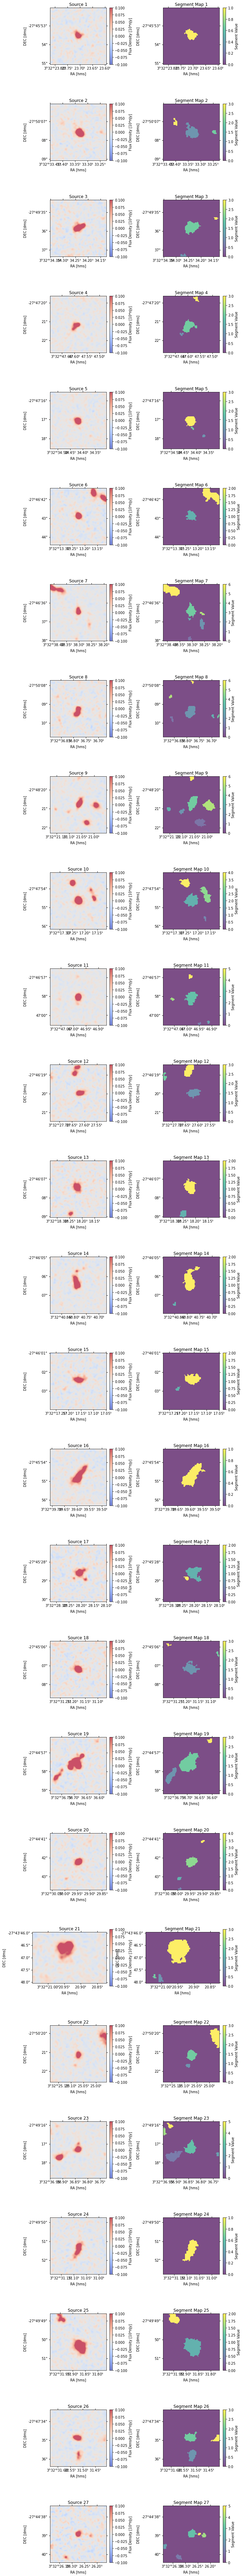

In [719]:
# Set up a grid of 27 rows and 2 columns
fig, axes = plt.subplots(nrows=len(data_sub_arr), ncols=2, figsize=(10, len(data_sub_arr) * 5))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.7, wspace=0.4)

# Loop through each pair of images and plot them side by side
for i in range(len(data_sub_arr)):
    # Plot the first image (data_sub_arr) in the left column
    ax0 = plt.subplot(len(data_sub_arr), 2, 2 * i + 1, projection=peak_cutout_wcs_arr[i])  # Set WCS for this subplot
    ax0.imshow(convolved_data_arr[i], vmax=0.1, vmin=-0.1, origin='lower', cmap='coolwarm', alpha=0.7, aspect='equal')
    ax0.set_xlabel('RA [hms]')
    ax0.set_ylabel('DEC [dms]')
    ax0.set_title(f"Source {i + 1}")
    
    # Plot the second image (segment_map_arr) in the right column
    ax1 = plt.subplot(len(data_sub_arr), 2, 2 * i + 2, projection=peak_cutout_wcs_arr[i])  # Set WCS for this subplot
    ax1.imshow(segment_map_arr[i], origin='lower', cmap='viridis', interpolation='nearest', alpha=0.7)
    ax1.set_xlabel('RA [hms]')
    ax1.set_ylabel('DEC [dms]')
    ax1.set_title(f"Segment Map {i + 1}")
    
    # Add a color bar for each subplot (optional)
    cbar0 = plt.colorbar(ax0.images[0], ax=ax0, fraction=0.046, pad=0.04)
    cbar0.set_label('Flux Density [%s]' % flux_units)

    cbar1 = plt.colorbar(ax1.images[0], ax=ax1, fraction=0.046, pad=0.04)
    cbar1.set_label('Segment Value')
# Save the entire figure
if use_control == True:
    
    plt.savefig('source_control_cut_seg_%s.jpg'%filt)
else:
    plt.savefig('source_eelgs_cut_seg_%s.jpg'%filt)
plt.show()
# Display the plot
plt.show()


In [728]:
segm_deblend_arr=[]
for i in range(len(ra)):
    segm_deblend_arr .append( deblend_sources(convolved_data_arr[i], segment_map_arr[i],
                                   npixels=10, nlevels=32, contrast=0.0001,
                                   progress_bar=False))

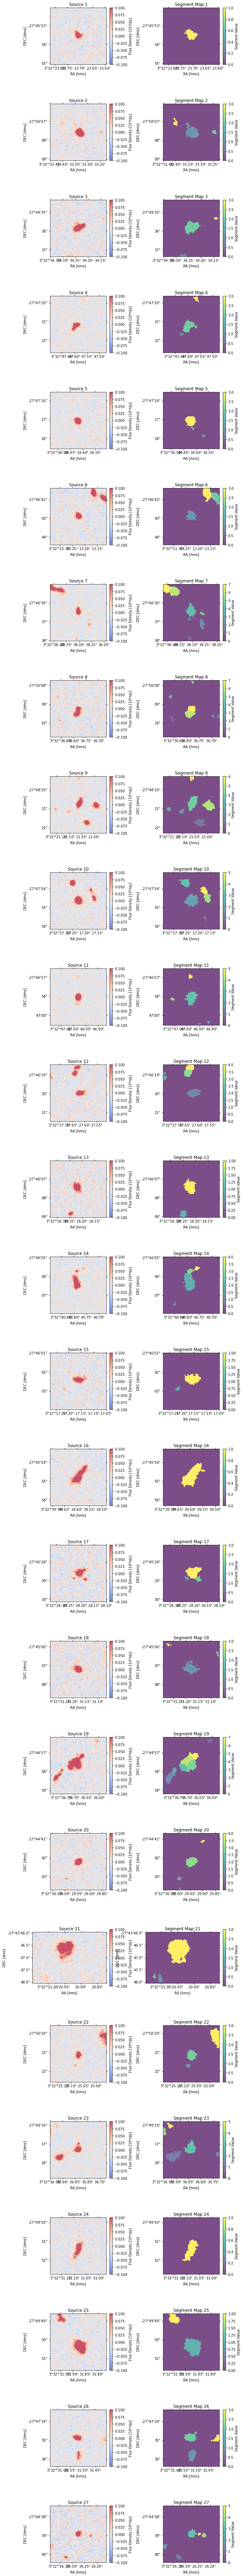

In [729]:
# Set up a grid of 27 rows and 2 columns
fig, axes = plt.subplots(nrows=len(data_sub_arr), ncols=2, figsize=(10, len(data_sub_arr) * 5))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.7, wspace=0.4)

# Loop through each pair of images and plot them side by side
for i in range(len(data_sub_arr)):
    # Plot the first image (data_sub_arr) in the left column
    ax0 = plt.subplot(len(data_sub_arr), 2, 2 * i + 1, projection=peak_cutout_wcs_arr[i])  # Set WCS for this subplot
    ax0.imshow(data_sub_arr[i], vmax=0.1, vmin=-0.1, origin='lower', cmap='coolwarm', alpha=0.7, aspect='equal')
    ax0.set_xlabel('RA [hms]')
    ax0.set_ylabel('DEC [dms]')
    ax0.set_title(f"Source {i + 1}")
    
    # Plot the second image (segment_map_arr) in the right column
    ax1 = plt.subplot(len(data_sub_arr), 2, 2 * i + 2, projection=peak_cutout_wcs_arr[i])  # Set WCS for this subplot
    ax1.imshow(segm_deblend_arr[i], origin='lower', cmap='viridis', interpolation='nearest', alpha=0.7)
    ax1.set_xlabel('RA [hms]')
    ax1.set_ylabel('DEC [dms]')
    ax1.set_title(f"Segment Map {i + 1}")
    
    # Add a color bar for each subplot (optional)
    cbar0 = plt.colorbar(ax0.images[0], ax=ax0, fraction=0.046, pad=0.04)
    cbar0.set_label('Flux Density [%s]' % flux_units)

    cbar1 = plt.colorbar(ax1.images[0], ax=ax1, fraction=0.046, pad=0.04)
    cbar1.set_label('Segment Value')
# Save the entire figure
if use_control == True:
    
    plt.savefig('source_control_cut_seg_%s.jpg'%filt)
else:
    plt.savefig('source_eelgs_cut_seg_%s.jpg'%filt)
plt.show()
# Display the plot
plt.show()


In [731]:
background_filled_arr = []
for i in range(len(ra)):
    background_filled_arr .append(fill_masked_with_noise(image=data_sub_arr[i],\
                                                         mask=~segm_deblend_arr[i].data_ma.mask))

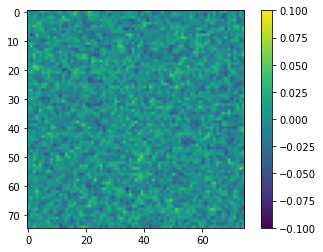

In [732]:
plt.imshow(background_filled_arr[-4], vmax=0.1, vmin=-0.1,)
plt.colorbar()

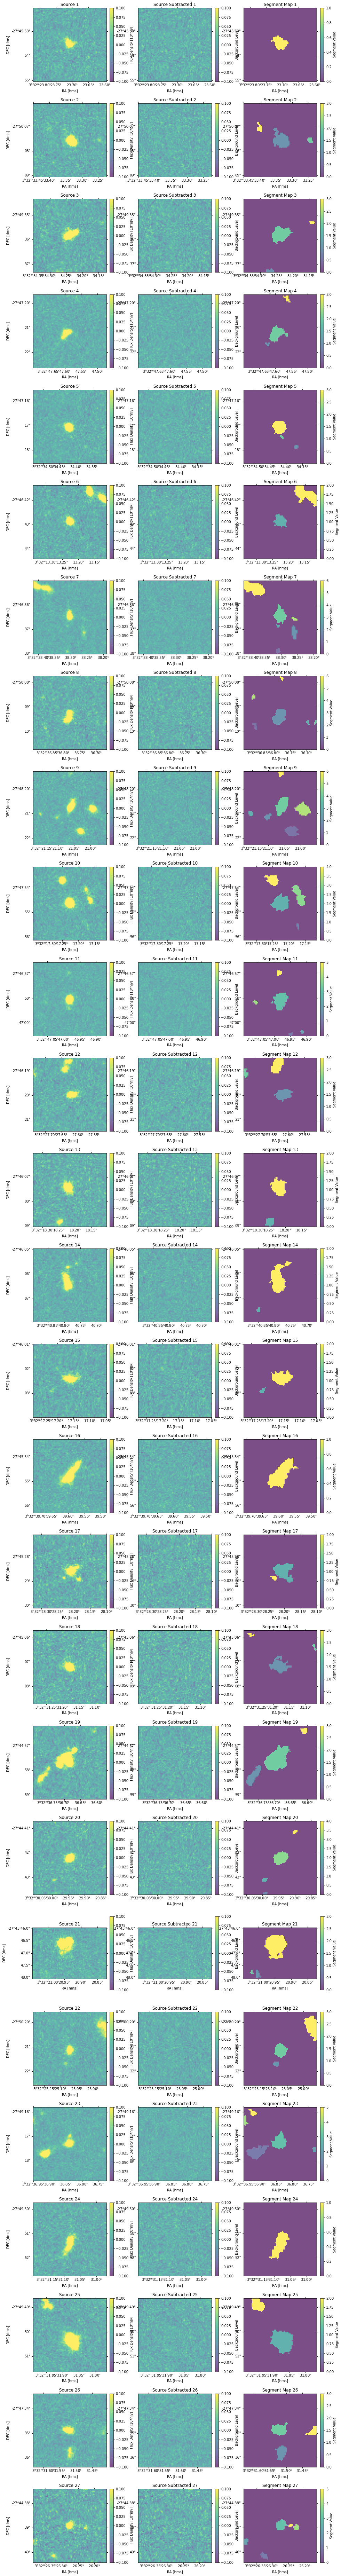

In [733]:
# Set up a grid of 27 rows and 3 columns
fig, axes = plt.subplots(nrows=len(data_sub_arr), ncols=3, figsize=(15, len(data_sub_arr) * 5))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=.3, wspace=.3)

# Loop through each set of images and plot them in the corresponding row
for i in range(len(data_sub_arr)):
    # Plot the first image (data_sub_arr) in the left column
    ax0 = plt.subplot(len(data_sub_arr), 3, 3 * i + 1, projection=peak_cutout_wcs_arr[i])  # Set WCS for this subplot
    ax0.imshow(data_sub_arr[i], vmax=0.1, vmin=-0.1, origin='lower', cmap='viridis', alpha=0.7, aspect='equal')
    ax0.set_xlabel('RA [hms]')
    ax0.set_ylabel('DEC [dms]')
    ax0.set_title(f"Source {i + 1}")
    
    # Plot the second image (background_filled_arr) in the middle column
    ax1 = plt.subplot(len(data_sub_arr), 3, 3 * i + 2, projection=peak_cutout_wcs_arr[i])  # Set WCS for this subplot
    ax1.imshow(background_filled_arr[i], vmax=0.1, vmin=-0.1, origin='lower', cmap='viridis', alpha=0.7)
    ax1.set_xlabel('RA [hms]')
    ax1.set_ylabel('DEC [dms]', visible=False)
    ax1.set_title(f"Source Subtracted {i + 1}")
    
    # Plot the third image (segment_map_arr) in the right column
    ax2 = plt.subplot(len(data_sub_arr), 3, 3 * i + 3, projection=peak_cutout_wcs_arr[i])  # Set WCS for this subplot
    ax2.imshow(segment_map_arr[i], origin='lower', cmap='viridis', interpolation='nearest', alpha=0.7)
    ax2.set_xlabel('RA [hms]')
    ax2.set_ylabel('DEC [dms]', visible=False)
    ax2.set_title(f"Segment Map {i + 1}")
    
    # Add a color bar for each subplot
    cbar0 = plt.colorbar(ax0.images[0], ax=ax0, fraction=0.046, pad=0.04)
    cbar0.set_label('Flux Density [%s]' % flux_units)

    cbar1 = plt.colorbar(ax1.images[0], ax=ax1, fraction=0.046, pad=0.04)
    cbar1.set_label('Background Level')

    cbar2 = plt.colorbar(ax2.images[0], ax=ax2, fraction=0.046, pad=0.04)
    cbar2.set_label('Segment Value')

# Save the entire figure
if use_control:
    plt.savefig(f'source_control_cut_seg_rem_src_{filt}.jpg')
else:
    plt.savefig(f'source_eelgs_cut_seg_rem_src_{filt}.jpg')

# Display the plot
plt.show()


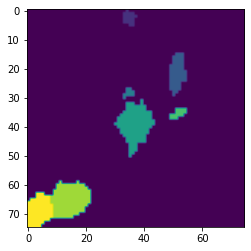

In [791]:
plt.imshow(segm_deblend_arr[6].data)

In [799]:
segm_deblend_arr[6].labels 

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [813]:
segm_deblend_arr[6].labels

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [808]:
label=1
segment_mask = (segm_deblend_arr[6].data == label)

# Apply the mask to the original image
segment_image = np.where(segment_mask, data_sub_arr[6], np.nan)  # Use NaN for masking other regions


In [887]:
def apply_closest_mask(data, segment):
    """
    Applies the closest mask to the centre of the input image.

    Parameters:
        data (numpy.ndarray): The 2D image array.
        segment (photutils.segmentation.SegmentationImage): The segmentation object.

    Returns:
        masked_image (numpy.ndarray): The image with the closest mask applied.
        closest_mask (numpy.ndarray): The closest mask applied to the image.
    """
    # Determine the centre pixel of the image
    centre_y, centre_x = np.array(data.shape) // 2
    
    # Get the number of segment labels
    nlabels = segment.nlabels
    print(f"Number of segments: {nlabels}")
    
    segment_mask = []
    mask_coords = []
    dist_mask = []
    
    for label in range(1, nlabels + 1):
        # Create a mask for the current label
        current_mask = segment.data == label
        segment_mask.append(current_mask)
        
        # Get pixel coordinates of the current mask
        mask_coords.append(np.array(np.where(current_mask)).T)
        
        # Compute the distance from the mask to the centre pixel
        distances = np.sqrt((mask_coords[label - 1][:, 1] - centre_x)**2 +
                            (mask_coords[label - 1][:, 0] - centre_y)**2)
        dist_mask.append(np.min(distances))  # Minimum distance for the current mask
    
    # Find the closest mask
    dist_mask = np.array(dist_mask)
    closest_mask_ind = int(np.argmin(dist_mask))  # Index of the closest mask
    closest_mask = segment_mask[closest_mask_ind]
    
    # Apply the closest mask to the image
    masked_image = np.where(closest_mask, data, np.nan)  # Replace masked regions with NaN
    
    return masked_image, closest_mask


In [883]:
np.zeros(shape=(7,)+data_sub_arr[1].shape).shape

(7, 75, 75)

In [888]:
masked_image, closest_mask = apply_closest_mask(data=data_sub_arr[1], segment=segm_deblend_arr[1])

Number of segments: 3


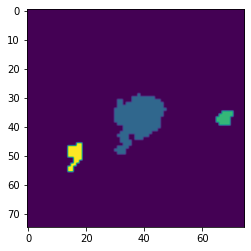

In [889]:
plt.imshow(segm_deblend_arr[1])

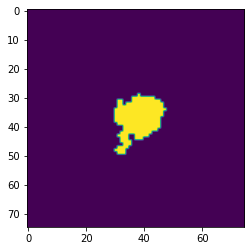

In [890]:
plt.imshow(closest_mask)

In [383]:
from astropy.io import fits
from photutils import background

# Load an image (FITS file) and get the data
image_data = fits.getdata(fitsfile)

# Set the threshold level for detection
threshold = detect_threshold(image_data, snr=3.0)


NameError: name 'detect_threshold' is not defined

In [ ]:

# Detect sources
from photutils import detect_sources
segm = detect_sources(image_data, threshold, npixels=5)

# View the segmentation map
segm_image = segm.data
